In [3]:
# Iris Dataset Analysis - Level 1 Data Analysis Tasks
# Task 1: Data Cleaning and Preprocessing
# Task 2: Exploratory Data Analysis (EDA)
# Task 3: Basic Data Visualization

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("🌸 Iris Dataset Analysis - Level 1 Tasks")
print("=" * 50)


🌸 Iris Dataset Analysis - Level 1 Tasks


In [4]:
# ============================================================================
# TASK 1: DATA CLEANING AND PREPROCESSING
# ============================================================================

print("\n✅ TASK 1: DATA CLEANING AND PREPROCESSING")
print("-" * 50)

# Load the dataset from your specified path
file_path = r"C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\1) iris.csv"

try:
    df = pd.read_csv(file_path)
    print(f"✓ Successfully loaded dataset from: {file_path}")
except FileNotFoundError:
    print(f"❌ Error: File not found at {file_path}")
    print("Please check the file path and try again.")
    # You can uncomment the line below if you want to exit on error
    # exit()
except Exception as e:
    print(f"❌ Error loading file: {e}")

print("\n1. Dataset Shape and Info:")
print(f"   Dataset shape: {df.shape}")
print(f"   Columns: {list(df.columns)}")
print(f"   Data types:\n{df.dtypes}")

print("\n2. First 5 rows of the dataset:")
print(df.head())

print("\n3. Last 5 rows of the dataset:")
print(df.tail())

print("\n4. Checking for Missing Values:")
missing_values = df.isnull().sum()
print(f"   Missing values per column:\n{missing_values}")
print(f"   Total missing values: {missing_values.sum()}")

# Handle missing values if any
if missing_values.sum() > 0:
    print("\n   Handling missing values:")
    # For numerical columns, we can use median imputation
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    for col in numerical_columns:
        if df[col].isnull().sum() > 0:
            median_value = df[col].median()
            df[col].fillna(median_value, inplace=True)
            print(f"   ✓ Filled missing values in {col} with median: {median_value}")
    
    # For categorical columns, use mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().sum() > 0:
            mode_value = df[col].mode()[0]
            df[col].fillna(mode_value, inplace=True)
            print(f"   ✓ Filled missing values in {col} with mode: {mode_value}")
else:
    print("   ✓ No missing values found!")

print("\n5. Checking for Duplicates:")
duplicates_before = df.duplicated().sum()
print(f"   Number of duplicate rows: {duplicates_before}")

if duplicates_before > 0:
    df_cleaned = df.drop_duplicates()
    print(f"   ✓ Removed {duplicates_before} duplicate rows")
    print(f"   Dataset shape after removing duplicates: {df_cleaned.shape}")
else:
    df_cleaned = df.copy()
    print("   ✓ No duplicate rows found!")

print("\n6. Data Format Standardization:")
# Check if species names are consistent
if 'species' in df_cleaned.columns:
    unique_species = df_cleaned['species'].unique()
    print(f"   Unique species: {unique_species}")
    
    # Standardize species names (lowercase and remove extra spaces)
    df_cleaned['species'] = df_cleaned['species'].str.lower().str.strip()
    print("   ✓ Standardized species names to lowercase")

print("\n7. Data Quality Summary:")
print(f"   ✓ Dataset loaded successfully")
print(f"   ✓ Shape: {df_cleaned.shape}")
print(f"   ✓ Missing values handled: {missing_values.sum()} filled")
print(f"   ✓ Duplicates removed: {duplicates_before}")
print(f"   ✓ Data formats standardized")



✅ TASK 1: DATA CLEANING AND PREPROCESSING
--------------------------------------------------
✓ Successfully loaded dataset from: C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\1) iris.csv

1. Dataset Shape and Info:
   Dataset shape: (150, 5)
   Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
   Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

2. First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

3. Last 5 rows of the dataset:
     sepal_length  sepal_width  petal_length  petal_width    

In [5]:
# ============================================================================
# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n\n✅ TASK 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("-" * 50)

# Calculate summary statistics
print("1. Summary Statistics:")
print(df_cleaned.describe())

# Get numerical columns for analysis
numerical_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n   Numerical columns: {numerical_columns}")

# Statistics by species
if 'species' in df_cleaned.columns:
    print("\n2. Summary Statistics by Species:")
    for species in df_cleaned['species'].unique():
        print(f"\n   {species.upper()}:")
        species_data = df_cleaned[df_cleaned['species'] == species][numerical_columns]
        print(species_data.describe())

print("\n3. Species Distribution:")
if 'species' in df_cleaned.columns:
    species_counts = df_cleaned['species'].value_counts()
    print(species_counts)
    print(f"\nMode (most common species): {df_cleaned['species'].mode()[0]}")
    
    # Calculate percentages
    species_percentages = df_cleaned['species'].value_counts(normalize=True) * 100
    print(f"\nSpecies distribution (%):")
    print(species_percentages)

# Calculate correlations
print("\n4. Correlation Matrix:")
if len(numerical_columns) > 1:
    correlation_matrix = df_cleaned[numerical_columns].corr()
    print(correlation_matrix)
    
    # Identify strongest correlations
    print("\n5. Strongest Correlations:")
    correlation_pairs = []
    for i in range(len(numerical_columns)):
        for j in range(i+1, len(numerical_columns)):
            col1, col2 = numerical_columns[i], numerical_columns[j]
            corr_value = correlation_matrix.loc[col1, col2]
            correlation_pairs.append((col1, col2, corr_value))
    
    # Sort by absolute correlation value
    correlation_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    print("   Top 5 correlations:")
    for i, (col1, col2, corr) in enumerate(correlation_pairs[:5]):
        print(f"   {i+1}. {col1} ↔ {col2}: {corr:.3f}")

# Additional statistics
print("\n6. Additional Statistical Measures:")
for col in numerical_columns:
    data = df_cleaned[col]
    print(f"\n   {col}:")
    print(f"      Mean: {data.mean():.2f}")
    print(f"      Median: {data.median():.2f}")
    print(f"      Mode: {data.mode().iloc[0]:.2f}")
    print(f"      Standard Deviation: {data.std():.2f}")
    print(f"      Variance: {data.var():.2f}")
    print(f"      Skewness: {data.skew():.2f}")
    print(f"      Kurtosis: {data.kurtosis():.2f}")
    print(f"      Range: {data.max() - data.min():.2f}")
    print(f"      IQR: {data.quantile(0.75) - data.quantile(0.25):.2f}")




✅ TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
--------------------------------------------------
1. Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

   Numerical columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

2. Summary Statistics by Species:

   SETOSA:
       sepal_length  sepal_width  petal_length  petal_width
count     48.000000    48.000000     48.000000    48.000000
mean       5.010417     3.431250      1.462500     0.250000
std        0.359219     0.383



✅ TASK 3: BASIC DATA VISUALIZATION
--------------------------------------------------
1. Creating histograms for all numerical features...


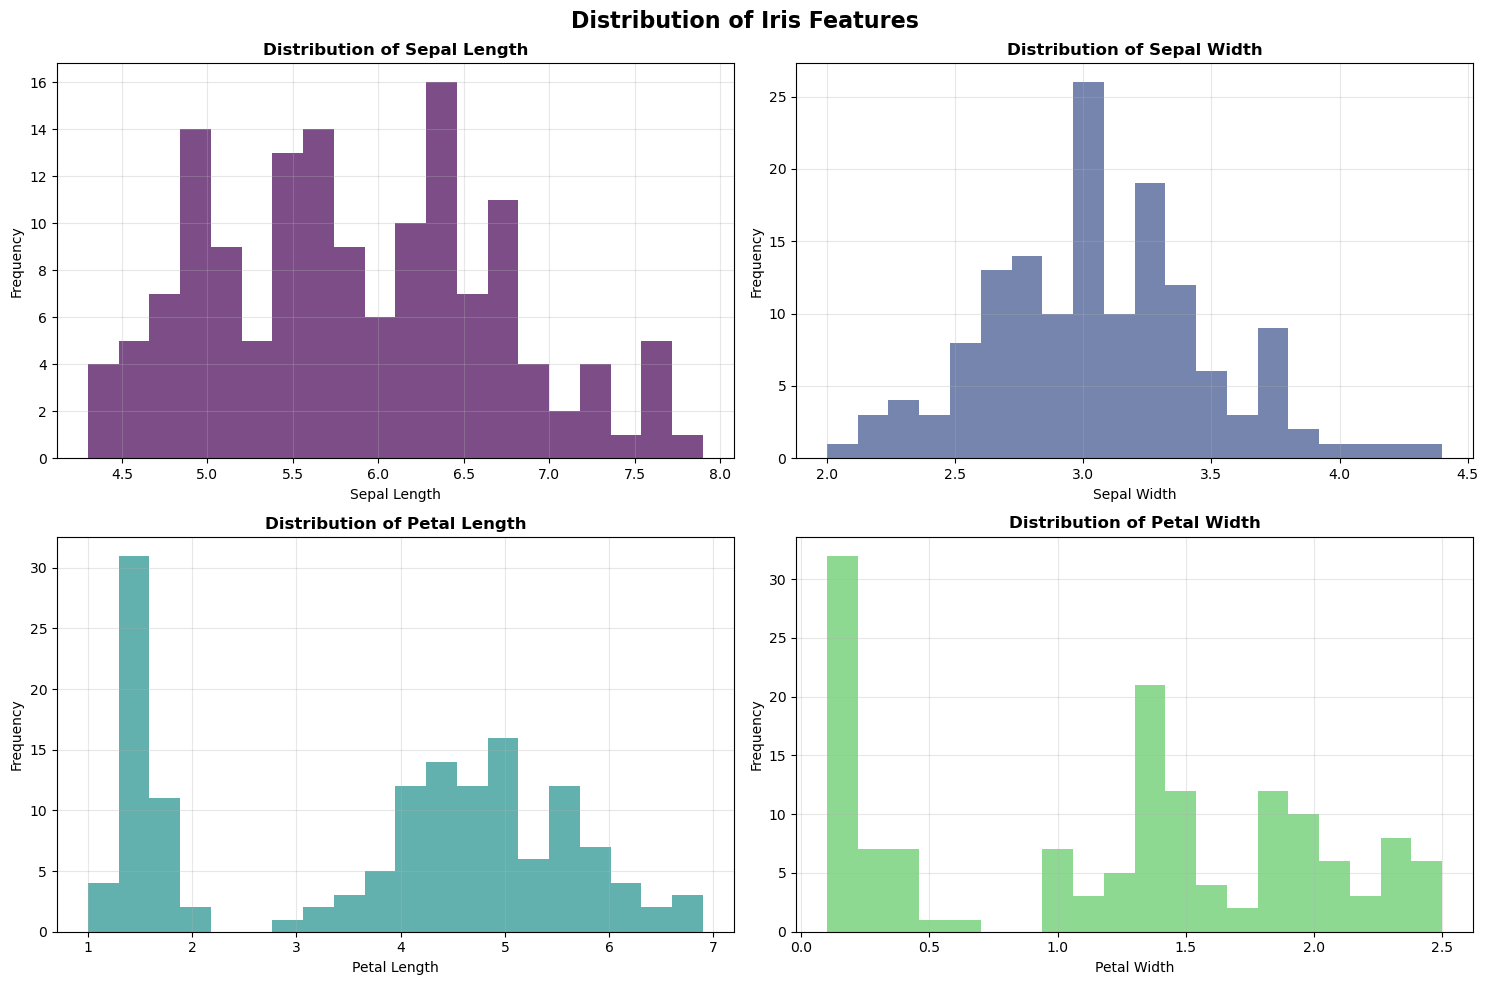


2. Creating box plots for each feature by species...


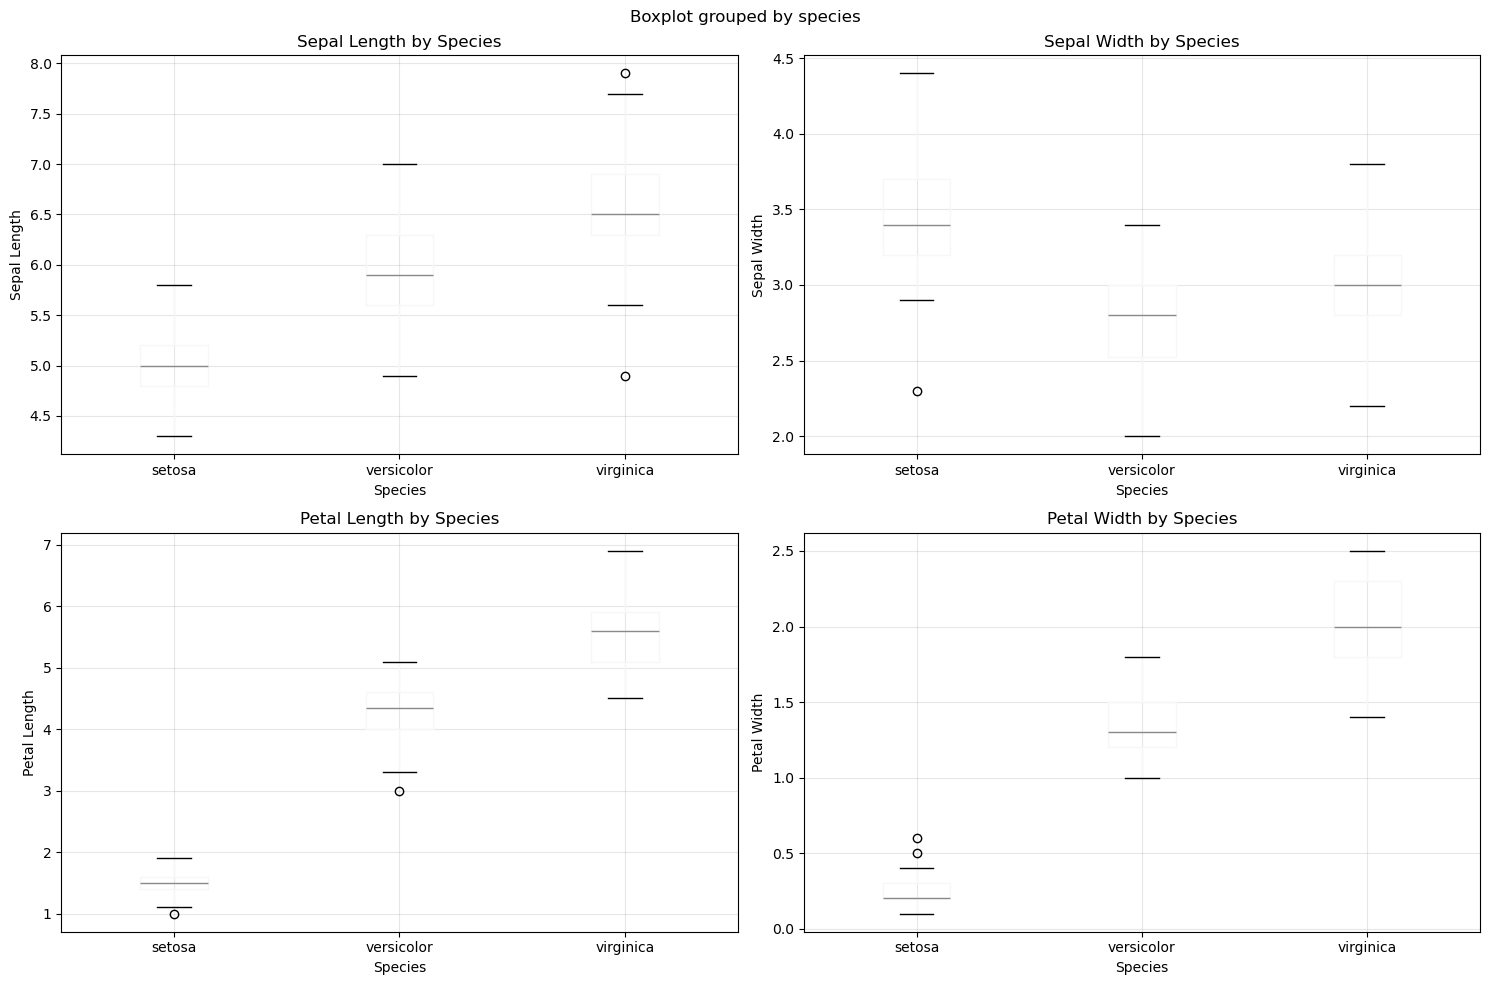


3. Creating scatter plots for feature relationships...


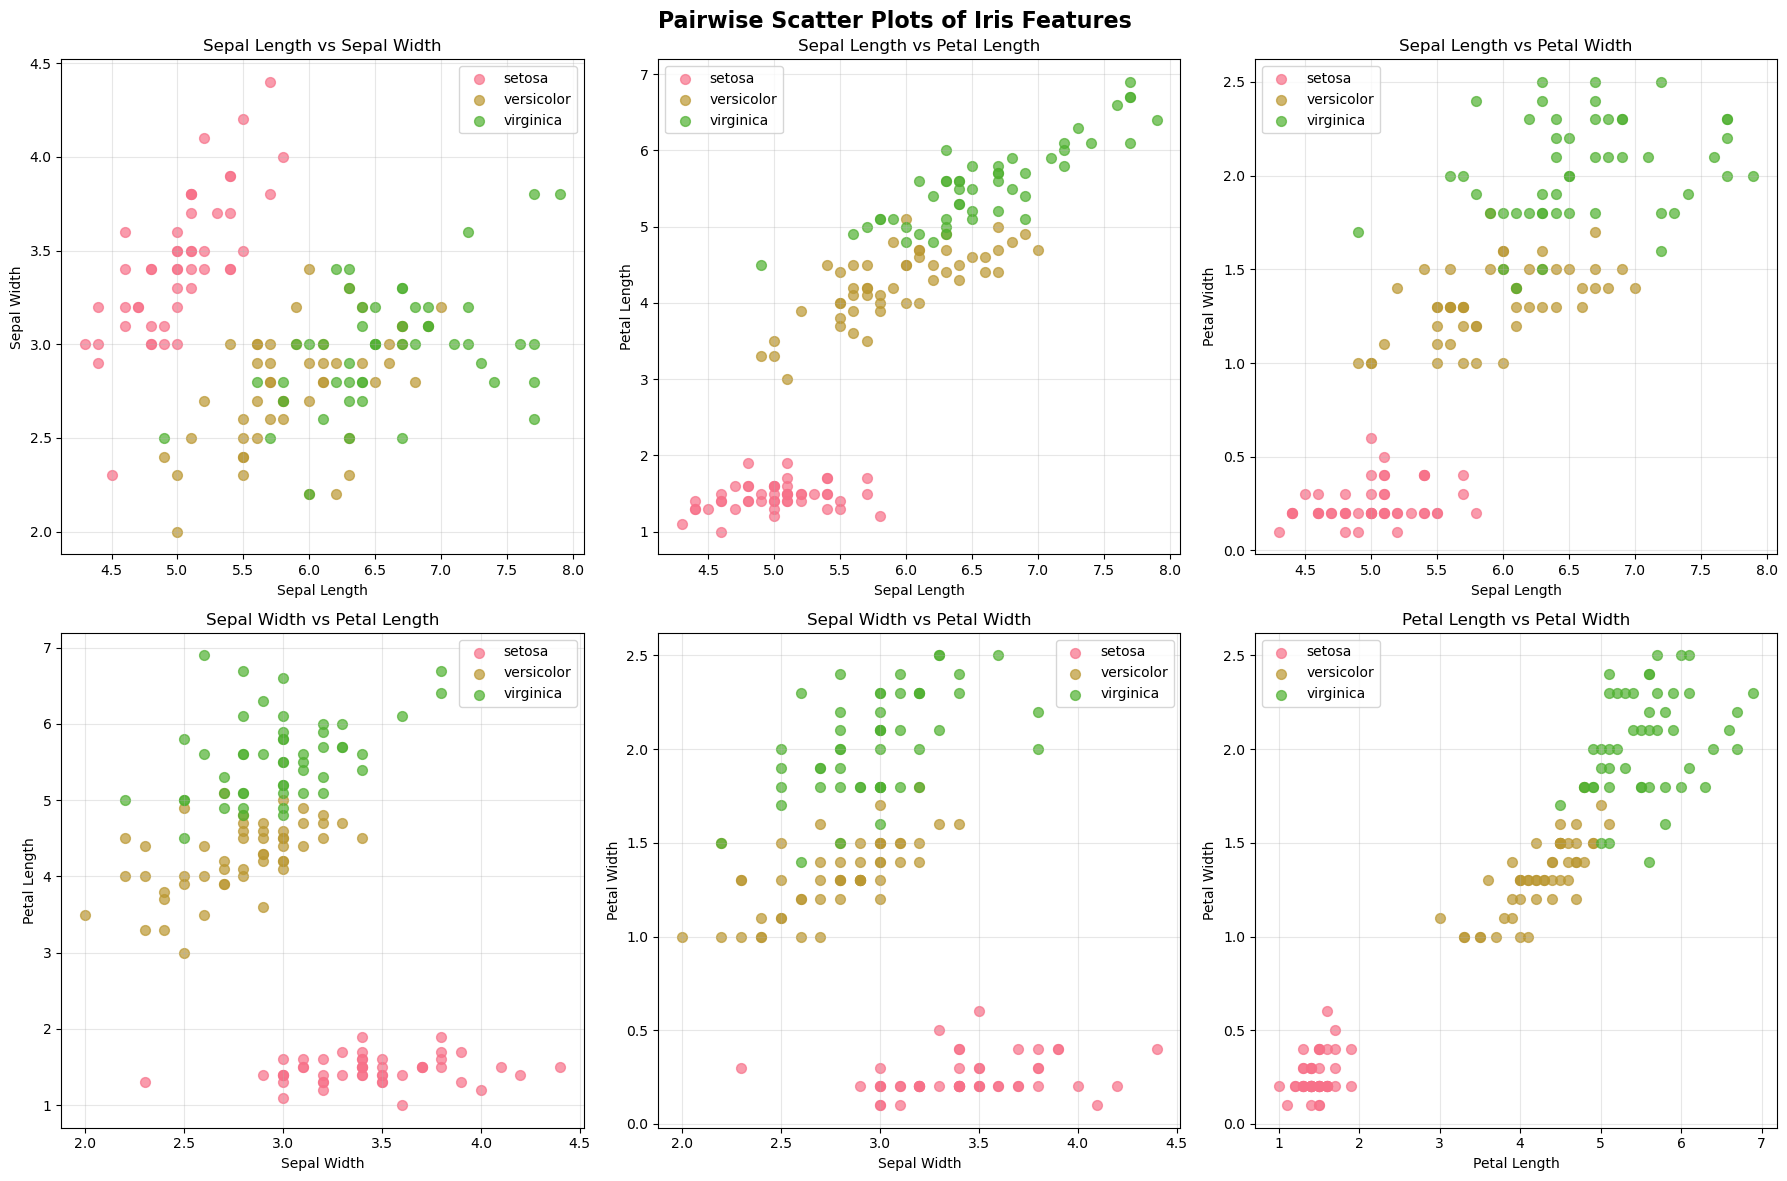


4. Creating correlation heatmap...


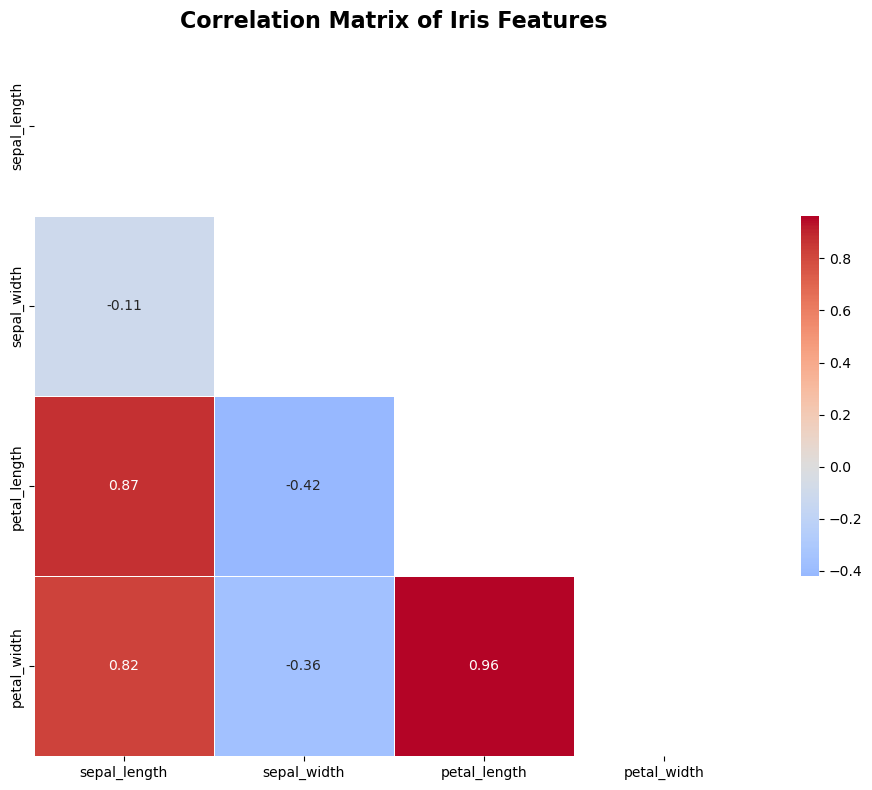


5. Creating species distribution bar chart...


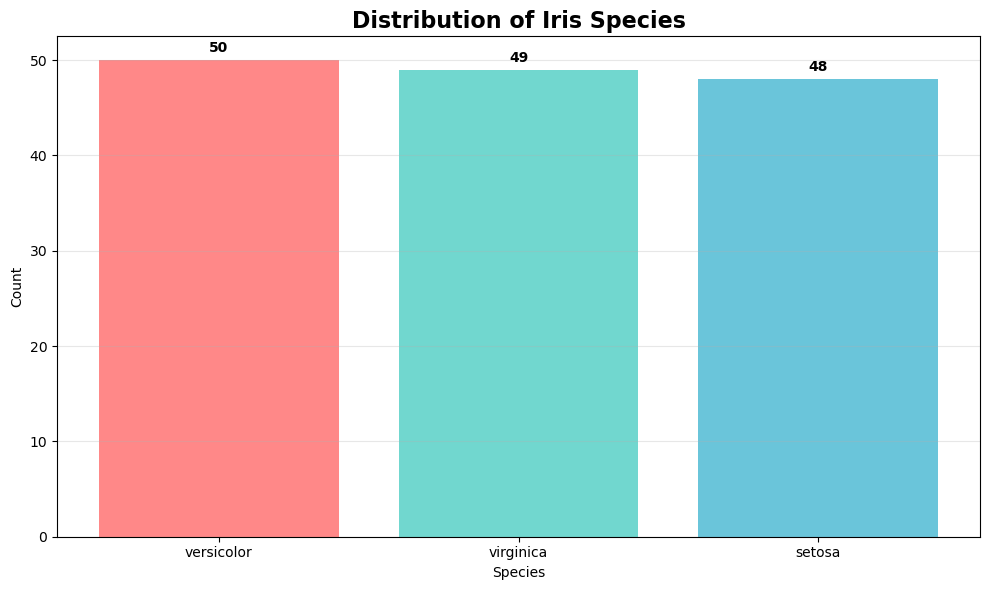


6. Creating line chart for feature averages by species...


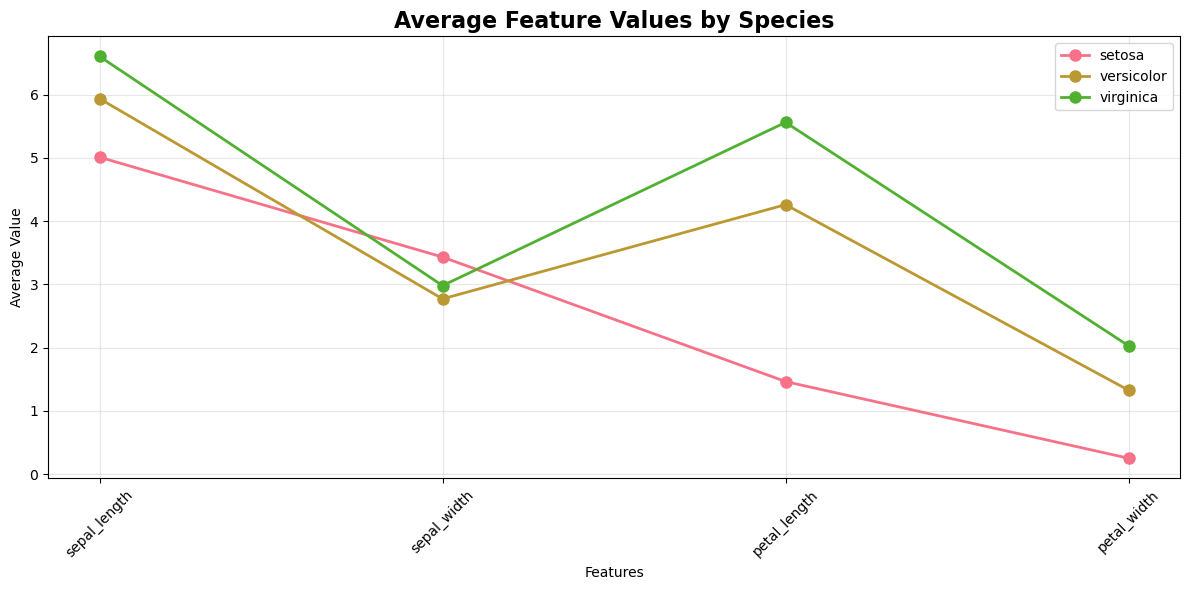

In [6]:
# ============================================================================
# TASK 3: BASIC DATA VISUALIZATION
# ============================================================================

print("\n\n✅ TASK 3: BASIC DATA VISUALIZATION")
print("-" * 50)

# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 1. Histograms for all numerical features
print("1. Creating histograms for all numerical features...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribution of Iris Features', fontsize=16, fontweight='bold')

for i, col in enumerate(numerical_columns):
    row, col_idx = i // 2, i % 2
    ax = axes[row, col_idx]
    
    # Create histogram
    ax.hist(df_cleaned[col], bins=20, alpha=0.7, color=plt.cm.viridis(i/len(numerical_columns)))
    ax.set_title(f'Distribution of {col.replace("_", " ").title()}', fontweight='bold')
    ax.set_xlabel(col.replace("_", " ").title())
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Box plots for each feature by species
print("\n2. Creating box plots for each feature by species...")
if 'species' in df_cleaned.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Box Plots of Iris Features by Species', fontsize=16, fontweight='bold')
    
    for i, col in enumerate(numerical_columns):
        row, col_idx = i // 2, i % 2
        ax = axes[row, col_idx]
        
        # Create box plot
        df_cleaned.boxplot(column=col, by='species', ax=ax)
        ax.set_title(f'{col.replace("_", " ").title()} by Species')
        ax.set_xlabel('Species')
        ax.set_ylabel(col.replace("_", " ").title())
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 3. Scatter plots for feature relationships
print("\n3. Creating scatter plots for feature relationships...")
# Pairwise scatter plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Pairwise Scatter Plots of Iris Features', fontsize=16, fontweight='bold')

plot_pairs = [
    ('sepal_length', 'sepal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_length', 'petal_width'),
    ('sepal_width', 'petal_length'),
    ('sepal_width', 'petal_width'),
    ('petal_length', 'petal_width')
]

for i, (x_col, y_col) in enumerate(plot_pairs):
    row, col_idx = i // 3, i % 3
    ax = axes[row, col_idx]
    
    if 'species' in df_cleaned.columns:
        # Color by species
        for species in df_cleaned['species'].unique():
            species_data = df_cleaned[df_cleaned['species'] == species]
            ax.scatter(species_data[x_col], species_data[y_col], 
                      label=species, alpha=0.7, s=50)
        ax.legend()
    else:
        ax.scatter(df_cleaned[x_col], df_cleaned[y_col], alpha=0.7, s=50)
    
    ax.set_xlabel(x_col.replace("_", " ").title())
    ax.set_ylabel(y_col.replace("_", " ").title())
    ax.set_title(f'{x_col.replace("_", " ").title()} vs {y_col.replace("_", " ").title()}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Correlation heatmap
print("\n4. Creating correlation heatmap...")
plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[numerical_columns].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Iris Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 5. Species distribution bar chart
print("\n5. Creating species distribution bar chart...")
if 'species' in df_cleaned.columns:
    plt.figure(figsize=(10, 6))
    species_counts = df_cleaned['species'].value_counts()
    bars = plt.bar(species_counts.index, species_counts.values, 
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
    
    plt.title('Distribution of Iris Species', fontsize=16, fontweight='bold')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, count in zip(bars, species_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# 6. Line chart showing feature averages by species
print("\n6. Creating line chart for feature averages by species...")
if 'species' in df_cleaned.columns:
    plt.figure(figsize=(12, 6))
    species_means = df_cleaned.groupby('species')[numerical_columns].mean()
    
    for species in species_means.index:
        plt.plot(numerical_columns, species_means.loc[species], 
                marker='o', linewidth=2, markersize=8, label=species)
    
    plt.title('Average Feature Values by Species', fontsize=16, fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Average Value')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [7]:
# ============================================================================
# SUMMARY REPORT
# ============================================================================

print("\n\n📊 ANALYSIS SUMMARY REPORT")
print("=" * 50)

print(f"Dataset Overview:")
print(f"  • Total records: {len(df_cleaned)}")
print(f"  • Features: {len(df_cleaned.columns)}")
print(f"  • Numerical features: {len(numerical_columns)}")
if 'species' in df_cleaned.columns:
    print(f"  • Species: {len(df_cleaned['species'].unique())}")

print(f"\nData Quality:")
print(f"  • Missing values handled: {missing_values.sum()}")
print(f"  • Duplicates removed: {duplicates_before}")
print(f"  • Data standardization: Complete")

print(f"\nKey Findings:")
if len(numerical_columns) > 0:
    print(f"  • Largest feature range: {df_cleaned[numerical_columns].max().max() - df_cleaned[numerical_columns].min().min():.2f}")
    if len(correlation_pairs) > 0:
        strongest_corr = correlation_pairs[0]
        print(f"  • Strongest correlation: {strongest_corr[0]} ↔ {strongest_corr[1]} ({strongest_corr[2]:.3f})")

if 'species' in df_cleaned.columns:
    print(f"  • Most common species: {df_cleaned['species'].mode()[0]}")
    print(f"  • Species balance: {species_counts.min()}-{species_counts.max()} samples per species")

print(f"\n✅ All Level 1 tasks completed successfully!")
print(f"   • Task 1: Data cleaning and preprocessing ✓")
print(f"   • Task 2: Exploratory data analysis ✓")
print(f"   • Task 3: Basic data visualization ✓")

# Optional: Save cleaned dataset
save_cleaned = input("\nWould you like to save the cleaned dataset? (y/n): ")
if save_cleaned.lower() == 'y':
    output_path = file_path.replace('.csv', '_cleaned.csv')
    df_cleaned.to_csv(output_path, index=False)
    print(f"✓ Cleaned dataset saved to: {output_path}")

print("\n🎉 Analysis complete! All visualizations have been generated.")



📊 ANALYSIS SUMMARY REPORT
Dataset Overview:
  • Total records: 147
  • Features: 5
  • Numerical features: 4
  • Species: 3

Data Quality:
  • Missing values handled: 0
  • Duplicates removed: 3
  • Data standardization: Complete

Key Findings:
  • Largest feature range: 7.80
  • Strongest correlation: petal_length ↔ petal_width (0.962)
  • Most common species: versicolor
  • Species balance: 48-50 samples per species

✅ All Level 1 tasks completed successfully!
   • Task 1: Data cleaning and preprocessing ✓
   • Task 2: Exploratory data analysis ✓
   • Task 3: Basic data visualization ✓



Would you like to save the cleaned dataset? (y/n):  y


✓ Cleaned dataset saved to: C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\1) iris_cleaned.csv

🎉 Analysis complete! All visualizations have been generated.


In [8]:
import os
print(os.getcwd())


C:\Users\engah


In [9]:
# Optional: Save cleaned dataset
save_cleaned = input("\nWould you like to save the cleaned dataset? (y/n): ")
if save_cleaned.lower() == 'y':
    output_path = file_path.replace('.csv', '_cleaned.csv')
    df_cleaned.to_csv(output_path, index=False)
    print(f"✓ Cleaned dataset saved to: {output_path}")



Would you like to save the cleaned dataset? (y/n):  y


✓ Cleaned dataset saved to: C:\Users\engah\OneDrive\Desktop\Codveda\Data Set For Task\1) iris_cleaned.csv
